This assignment includes a theoretical part and an application part. Demonstrate your understanding of the concepts discussed in this topic, research a technique, and implement it. 

#### Part 1: Theory 

1. What is the role of a confusion matrix in the evaluation of a machine trained for a pattern recognition task? In your answer, refer to a concrete example, either from literature or one you created. Anchor you answer in relevant literature. 

2. What is the role of the ROC curve? How would you use it to compare the performance of several classifiers? In your answer, refer to concrete examples of classifiers, either from literature or one you created. Illustrate the ROC curves and anchor your answer in relevant literature. 

#### Part 2: Application 

You are tasked to build an image classifier for the MNIST dataset of handwritten numbers, implementing the k-nearest neighbors (k-NN) algorithm. You will need the following: 

The MNIST dataset, available on multiple servers on the Internet. For example: 

- http://yann.lecun.com/exdb/mnist/ 

- http://www.pymvpa.org/datadb/mnist.html 

The Python package neighbors.KNeighborsClassifier:   

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

The input to your classifier program is an image containing a digit, 0-9. Your program must correctly identify the digit with an accuracy of 95%. Here the outline of your task, but you will have to do a bit of research on your own (and increasingly so throughout the program) to fill in the details: 

Familiarize yourself with the MNIST dataset 

Familiarize yourself with the k-NN algorithm and its Python implementation in sklearn 

Create a Jupyter notebook for this assignment and implement the k-NN algorithm: 

- Import the package kNeighborsClassifier. 

- Be mindful of the train-test split and set the parameters accordingly (justify your choice). 

- Identify the variables in the dataset and define the Euclidean distance between an element in the test set and the training set. 

- Calculate the distance between the test element and each of if its k nearest neighbors. 

- Count the occurrence of each digit within the k nearest neighbors and identify the most popular digit. 

- Identify the test element as the digit voted as most popular in the set of the k nearest neighbors. 

- Classify the test element accordingly (i.e. based on the popular vote). 

- Calculate the error. 


#### Part 3: Report

Review the article “Handwritten Digit Recognition Using K-Nearest Neighbour Classifier.” Note the algorithms used, but focus on the way the authors: 


- Present the findings 

- Discuss the findings 

- Calculate the accuracy of the results 

- Write the article, using professional terminology and content organization 

Write a technical report (i.e., not a full-fledged academic paper) to accompany the Jupyter notebook that implements the classifier, using the aforementioned article as a guide on what to address and how to present the mini-project and report the findings. 

- Address the potential role of a confusion matrix in your report (refer to Part 1). 

- Address the potential role of ROC curve in your report (refer to Part 1). 

APA style is expected, as well as formal and rigorous scientific writing, using appropriate mathematical notation and references. 

### PART 1.1

Confusion matrices are fantastic tools that are used to evaluate the performance of a trained model. There are several scores that each give critical information that help inform the data scientist about which model performs better than the other. Each score gives critical information and depending on the objective of the model, each one can serve a different purpose. While the matrix lays out the true positives, true negatives, false positives, and false negatives the data scientist can calculate the following metrics: misclassification rate, success rate, true positive rate, true negative rate, sensitivity, specificity, precision, recall, f1 score, and the receiver operating characteristic (ROC) curve. With all the scores that come from the predicted values versus the actual values a data scientist can correctly assess the performance of the model given the business objective (Gopal, 2019, p. 71). 


One example is when predicting cancer patients, the classification predicts that a certain patient has cancer, so the doctor goes to him and his family and tells him about this and all the possibilities. However, if you find out you incorrectly classified him as having cancer when really, he does not you will have to tell him and his family who might be in shock. That’s why the data scientist wants the classifier 100% confident, or in more simpler words they want 100% precision. The worse situation in this example is classifying a patient that actually has cancer as not having cancer. They will then think they are safe but in reality, they would die soon. This is very bad situation, and to avoid it the data scientist would want to increase the recall.  


### PART 1.2


The ROC curve uses information from the confusion matrix, the predicted values and the actual values, to generate the following information and scores. The ROC curve is on a two-dimensional graph which plots the true positive rate, sensitivity, on the y-axis and false positive rate, complement of the specificity, on the x-axis. A ROC curve shows relative trade-offs between advantages, true positives, and costs, false positives (Gopal, 2019, p. 75). When making decisions and comparisons with the ROC curve, the preferred plot will have points moving to the top left corner - true positive rate is higher while false positive rate is lower. The data scientist will also consider and make comparisons by calculating the area under this curve (McClish, 1989). 


### PART 2

In k-NN classification, the output is a class. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. The k nearest neighbor (kNN) method is a popular classification method in data mining and statistics because of its simple implementation and significant classification performance. However, it is impractical for traditional kNN methods to assign a fixed k value (even though set by experts) to all test samples (Zhang, 2018).

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_roc_curve, roc_curve
from skimage import exposure
import imutils
import cv2
import sklearn

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

4


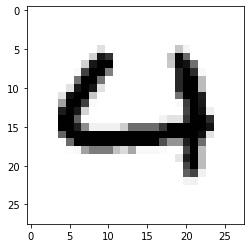

In [14]:
%matplotlib inline
image_index = 60 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [15]:
mnist = datasets.load_digits()
 
# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, 
                                                                  test_size=0.25, random_state=42)
 
# Take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, 
                                                                test_size=0.1, random_state=84)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


In [16]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the list of 
# accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 30, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], accuracies[i] * 100))

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data


In [17]:
# re-train the classifier using the best k value and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=kVals[i])
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [18]:
# evaluate the model and update the accuracies list
score = model.score(valData, valLabels)
print("accuracy = ", (score * 100))
print("error = ", (1 - score)*100)

accuracy =  99.25925925925925
error =  0.7407407407407418


In [9]:
# validate 
for i in list(map(int, np.random.randint(0, high=len(testLabels), size=(1,)))):
    # grab the image and classify it
    image = testData[i]
    prediction = model.predict(image.reshape(1, -1))[0]
 
    # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
    # then resize it to 32 x 32 pixels so we can see it better
    image = image.reshape((8, 8)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
 
    # show the prediction
    print("I think that digit is: {}".format(prediction))
    cv2.imshow("Image", image)
    cv2.waitKey(0)

I think that digit is: 2


In [ ]:
# see attached image for result

In [21]:
# construct confusion matrix
print(confusion_matrix(testLabels, predictions))

# all results and analysis attached with part 3 below

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  1  1  1  0  0  0 45]]


### Part 3 

Attached separately

### References: